Import Package

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from deap import base, creator, tools, algorithms

Load sample image

<function matplotlib.pyplot.show(close=None, block=None)>

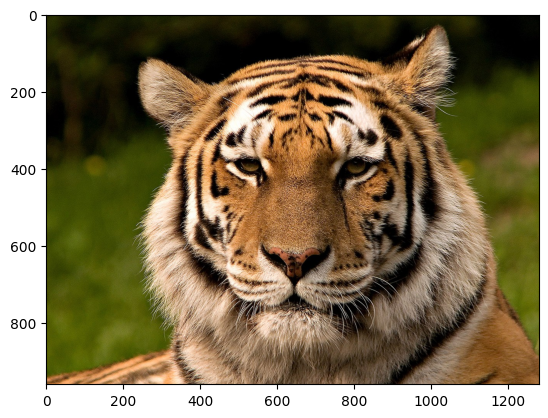

In [5]:
path_image = r"C:\Users\acer\Downloads\harimau.jpg"
im = np.asarray(Image.open(path_image).convert('L'))

image = mpimg.imread(path_image)
plt.imshow(image)
plt.show

For generates a binary image where pixels in the original image>= 150 are set to 1 (white), and all other pixels are set to 0 (black)

In [6]:
def threshold_image(im, th):
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1
    return thresholded_im

For Evaluate otsu criteria and determining the optimal threshold for image binarization minimizing the within-class variance

In [7]:
def compute_otsu_criteria(im, th):
    thresholded_im = threshold_image(im, th)
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weigth1 = nb_pixels1 / nb_pixels
    weigth0  = 1 - weigth1
    if weigth1 == 0 or weigth0 == 0:
        return np.inf
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    return weigth0 * var0 + weigth1 * var1

For run the Genetic Algorithm (GA) using the DEAP library to find the optimal threshold value for image binarization based on Otsu's criteria

In [8]:
# Genetic Algorithm setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 0, 256)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_individual(individual):
    return compute_otsu_criteria(im, individual[0]),

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=255, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_individual)

def main():
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, stats=stats, halloffame=hof, verbose=True)
    
    return hof[0]


For executes GA to find the best threshold for binarizing an image based on Otsu's criteria, then applies this threshold to create a binary image.

In [9]:
best_threshold = main()
print(f"\nBest threshold found by GA: {best_threshold}")

thresholded_image = im >= best_threshold[0]

d:\PKL_VisualInspection\PKL Magang\GUI\.venv\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


gen	nevals	avg	std	min    	max
0  	300   	inf	nan	1229.47	inf
1  	183   	inf	nan	1229.47	inf
2  	193   	1386.12	387.862	1229.47	3880.18
3  	188   	1266.13	200.021	1229.47	4006.78
4  	174   	1267.88	254.746	1229.47	4060.32
5  	188   	1291.88	342.406	1229.47	3944.46
6  	185   	1263.9 	225.751	1229.47	3524.56
7  	168   	1268.76	231.39 	1229.47	3554.9 
8  	192   	inf    	nan    	1229.47	inf    
9  	179   	1264.13	241.034	1229.47	3527.66
10 	194   	1270.42	233.297	1229.47	3419.67
11 	178   	1268.88	260.1  	1229.47	3652.45
12 	199   	1266.47	267.586	1229.47	3944.46
13 	193   	1267.84	252.076	1229.47	3661.91
14 	195   	1269.91	270.284	1229.47	3922.63
15 	168   	1274.89	309.888	1229.47	3901.58
16 	196   	1267.66	250.998	1229.47	3922.63
17 	167   	1292.03	318.657	1229.47	3738.92
18 	168   	1280.82	287.615	1229.47	4060.32
19 	170   	1266.24	247.811	1229.47	3880.56
20 	187   	1270.97	281.722	1229.47	4042.91
21 	172   	1252.3 	195.978	1229.47	3922.63
22 	174   	1259.8 	238.887	1229.47	3922.63
23 	

Show the result

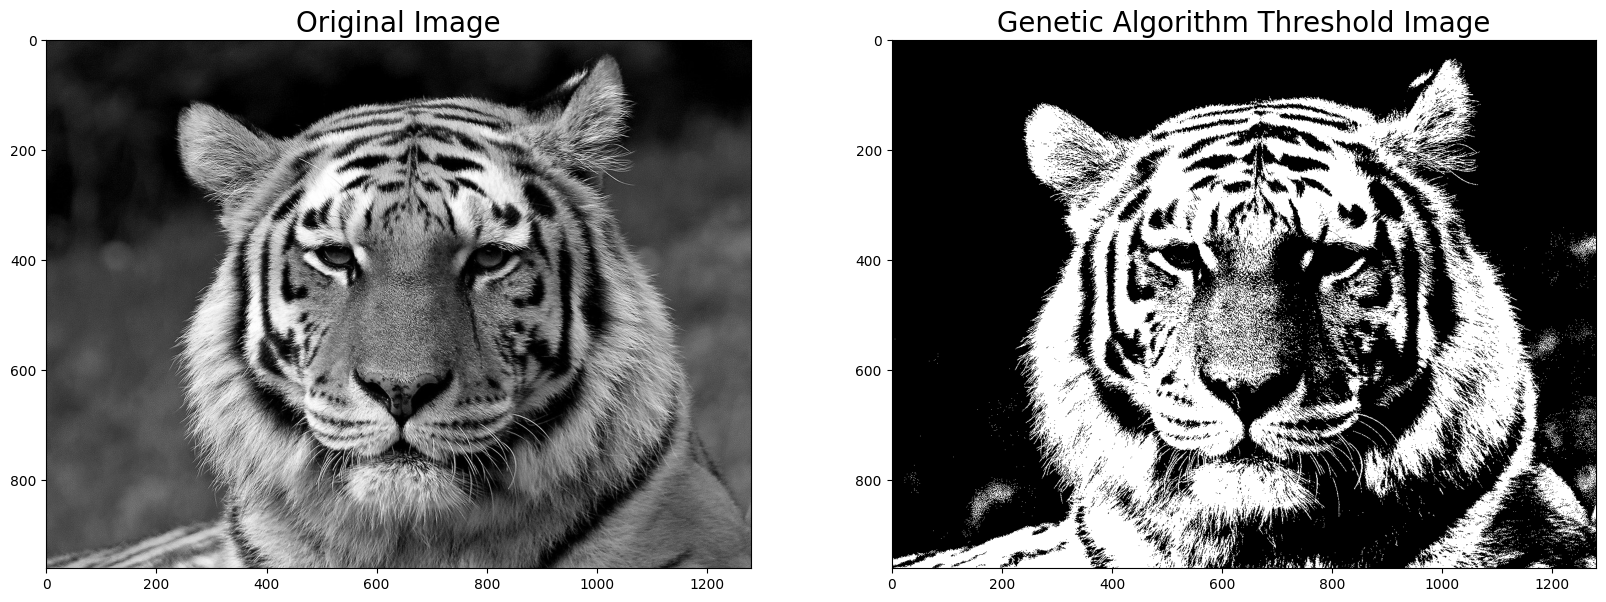

In [10]:
# Plot the original and thresholded images
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image', fontsize=20)
plt.imshow(im, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Genetic Algorithm Threshold Image', fontsize=20)
plt.imshow(thresholded_image, cmap='gray')
plt.show()